A notbook dedicated to drawing graphs and charts, and extracting tables from result files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Set display format for float numbers
pd.options.display.float_format = '{:.2f}'.format

### First analysis aim:
plot line of the repair computation time (for 2 methods) with respect to percentage of assertions in conflict for three different datasets (10^3, 10^4, 5*10^4) 

In [14]:
# use as example the old result file
result_file = "../results/ABox_RDF_type_and_mappingbased_objects_compute_repair_experiments_copy.csv"
result_file = "../results/ABox_RDF_dbr_repair_experiments.csv"
result_file = "../results/ABox_RDF_type_experiments_larger_repair.csv"

In [15]:
result_df = pd.read_csv(result_file, sep=",", header=0)

In [16]:
result_df.columns

Index(['new_method_ABox_size', 'new_method_Closure_size',
       'new_method_Closure_time', 'new_method_Conflicts_size',
       'new_method_Conflicts_time', 'new_method_Cpi_repair_size',
       'new_method_Cpi_repair_time', 'new_method_Total_time',
       'new_method_size_all_supports', 'old_method_ABox_size',
       'old_method_Closure_size', 'old_method_Closure_time',
       'old_method_Conflicts_size', 'old_method_Conflicts_time',
       'old_method_Cpi_repair_size', 'old_method_Cpi_repair_time',
       'old_method_Supports_time', 'old_method_Total_time',
       'old_method_size_all_supports', 'old_method_assertions_in_conflict'],
      dtype='object')

In [17]:
# we have two indicators of plots: new_method_ABoxs_size and old_method_assertions_in_conflict
# first create a new column for percent_assertions_in_conf : 
result_df["percent_assertions_in_conf"] = result_df["old_method_assertions_in_conflict"] * 100 / result_df["new_method_ABox_size"]

In [18]:
result_df.head(12)

,new_method_ABox_size,new_method_Closure_size,new_method_Closure_time,new_method_Conflicts_size,new_method_Conflicts_time,new_method_Cpi_repair_size,new_method_Cpi_repair_time,new_method_Total_time,new_method_size_all_supports,old_method_ABox_size,...,old_method_Closure_time,old_method_Conflicts_size,old_method_Conflicts_time,old_method_Cpi_repair_size,old_method_Cpi_repair_time,old_method_Supports_time,old_method_Total_time,old_method_size_all_supports,old_method_assertions_in_conflict,percent_assertions_in_conf
0,1000,2884,2.91,10,42.69,2847,0.13,45.73,2884,1000,...,2.66,10,42.79,2847,0.11,52.42,97.99,2884,20,2.00
1,1000,3056,3.07,100,43.41,2740,0.64,47.12,3056,1000,...,2.94,100,44.76,2740,0.70,57.90,106.30,3056,200,20.00
2,1000,3224,3.07,250,45.03,2404,1.35,49.44,3224,1000,...,2.95,250,44.74,2404,2.09,59.25,109.03,3224,500,50.00
3,10000,30036,3.09,100,44.48,29720,6.99,54.56,30036,10000,...,2.74,100,42.52,29720,7.01,529.68,581.94,30036,200,2.00
4,10000,30335,3.14,1001,46.91,27126,67.95,118.00,30339,10000,...,2.81,1001,45.12,27126,75.27,543.32,666.52,30339,2000,20.00
5,10000,31392,3.36,2502,50.21,23449,150.08,203.64,31398,10000,...,2.94,2502,49.10,23449,206.18,609.13,867.35,31398,5000,50.00
6,50000,150071,3.83,503,48.42,148453,184.20,236.44,150089,50000,...,3.53,503,50.67,148453,178.30,2894.10,3126.60,150089,1000,2.00
7,50000,152938,3.88,5019,48.95,136941,1732.90,1785.74,153011,50000,...,3.51,5019,52.32,136941,1888.42,2998.48,4942.73,153011,10000,20.00
8,50000,157476,3.66,12532,51.15,117792,3796.02,3850.83,157577,50000,...,3.22,12532,50.13,117792,5139.75,3137.83,8330.91,157577,25000,50.00


In [19]:
table_results = result_df[['new_method_ABox_size', 'percent_assertions_in_conf', 'new_method_Conflicts_size', 'new_method_Conflicts_time', 'old_method_Closure_time', 'new_method_Closure_time']].round(2)

In [20]:
table_results.head(12)

,new_method_ABox_size,percent_assertions_in_conf,new_method_Conflicts_size,new_method_Conflicts_time,old_method_Closure_time,new_method_Closure_time
0,1000,2.00,10,42.69,2.66,2.91
1,1000,20.00,100,43.41,2.94,3.07
2,1000,50.00,250,45.03,2.95,3.07
3,10000,2.00,100,44.48,2.74,3.09
4,10000,20.00,1001,46.91,2.81,3.14
5,10000,50.00,2502,50.21,2.94,3.36
6,50000,2.00,503,48.42,3.53,3.83
7,50000,20.00,5019,48.95,3.51,3.88
8,50000,50.00,12532,51.15,3.22,3.66


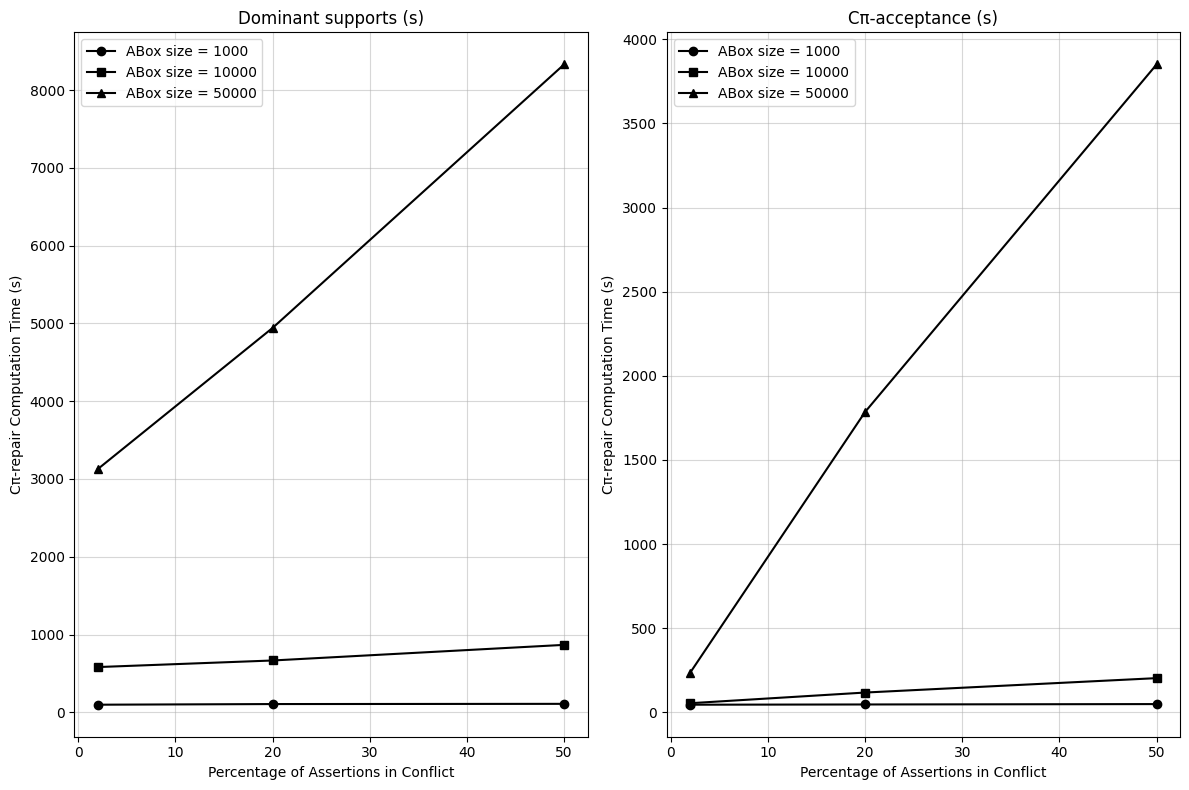

In [39]:
# Marker styles for the 3 ABox sizes
markers = ['o', 's', '^']

# Unique sizes
abox_sizes = sorted(result_df['new_method_ABox_size'].unique())

fig, axes = plt.subplots(1, 2, figsize=(12, 8), sharex=True)

methods = ['old_method_Total_time', 'new_method_Total_time']
titles = ['Dominant supports (s)', 'Cπ-acceptance (s)']

for idx, ax in enumerate(axes):
    method = methods[idx]

    for i, abox_size in enumerate(abox_sizes):
        group = result_df[result_df['new_method_ABox_size'] == abox_size]
        group = group.sort_values(by='percent_assertions_in_conf')

        ax.plot(group['percent_assertions_in_conf'], group[method], marker=markers[i], linestyle='-', label=f'ABox size = {abox_size}', color='black', markersize=6)

    ax.set_title(titles[idx])
    ax.set_xlabel('Percentage of Assertions in Conflict')
    ax.set_ylabel('Cπ-repair Computation Time (s)')

    ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=10))

    ax.legend()
    ax.grid(True, alpha=0.5)

# title = 'Comparison of Cπ-repair Computation run-time using (2) Characterisations.'
plt.tight_layout()
plt.show()

In [33]:
result_df['int_percent_assertions_in_conf'] = result_df['percent_assertions_in_conf'].map(int)

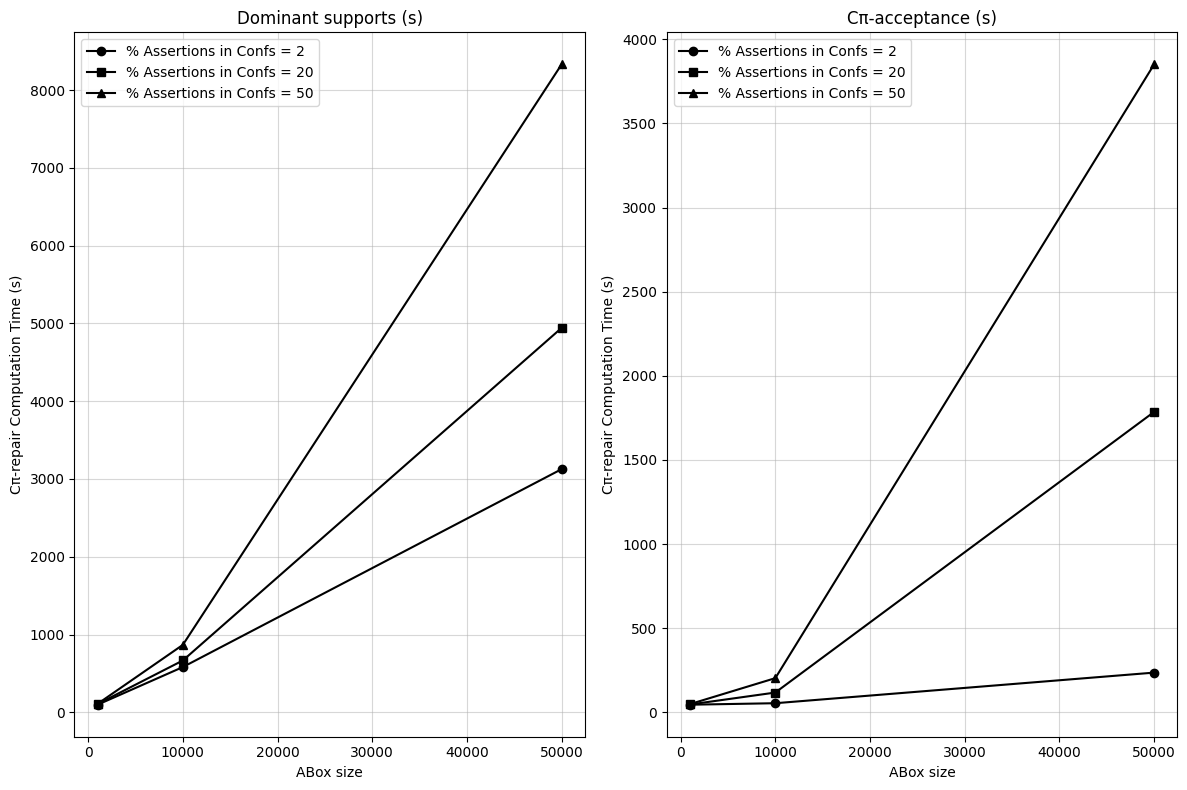

In [40]:
# Marker styles for the 3 ABox sizes
markers = ['o', 's', '^']

# Unique sizes
abox_sizes = sorted(result_df['int_percent_assertions_in_conf'].unique())

fig, axes = plt.subplots(1, 2, figsize=(12, 8), sharex=True)

methods = ['old_method_Total_time', 'new_method_Total_time']
titles = ['Dominant supports (s)', 'Cπ-acceptance (s)']

for idx, ax in enumerate(axes):
    method = methods[idx]

    for i, abox_size in enumerate(abox_sizes):
        group = result_df[result_df['int_percent_assertions_in_conf'] == abox_size]
        group = group.sort_values(by='new_method_ABox_size')

        ax.plot(group['new_method_ABox_size'], group[method], marker=markers[i], linestyle='-', label=f'% Assertions in Confs = {abox_size}', color='black', markersize=6)

    ax.set_title(titles[idx])
    ax.set_xlabel('ABox size')
    ax.set_ylabel('Cπ-repair Computation Time (s)')

    ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=10))
    
    ax.legend()
    ax.grid(True, alpha=0.5)

# title = 'Comparison of Cπ-repair Computation run-time using (2) Characterisations.'
plt.tight_layout()
plt.show()

### Old analysis

In [183]:
result_files = ["../results/ABox_RDF_type_experiments_larger_repair.csv", "../results/ABox_RDF_type_experiments_smaller_repair.csv"]
result_files = ["../results/ABox_RDF_type_and_mappingbased_objects_compute_repair_experiments.csv"]

In [184]:
#result_file = "../results/ABox_RDF_type_experiments.csv"
#result_file = "../results/ABox_RDF_type_experiments_fixed.csv"
#result_file = "../results/ABox_RDF_type_experiments_larger_repair.csv"

In [185]:
# Create an empty list to store DataFrames
dfs = []

for result_file in result_files:
    # Read the CSV file
    df = pd.read_csv(result_file, sep=",", header=0)

    # Add model column
    if "smaller" in result_file:
        df['exp'] = "stronger_dominance"
    elif "larger" in result_file:
        df['exp'] = "weaker_dominance"
    else:
        print("Wrong file name.")

    # Append to list
    dfs.append(df)

# Concatenate all DataFrames
results_df = pd.concat(dfs, ignore_index=True)

Wrong file name.


In [187]:
#result_df = pd.read_csv(result_file, sep=',')

In [188]:
# name Mappings
mapping_names = [
    ("it_n1e03_p2e-02", 1000, 10),
    ("it_n1e03_p2e-01", 1000, 100),
    ("it_n1e03_p5e-01", 1000, 250),
    ("it_n1e04_p2e-02", 10000, 100),
    ("it_n1e04_p2e-01", 10000, 1001),
    ("it_n1e04_p5e-01", 10000, 2502),
    ("it_n5e04_p2e-02", 50000, 503),
    ("it_n5e04_p2e-01", 50000, 5019),
    ("it_n5e04_p5e-01", 50000, 12532),
    ("it_n1e05_p2e-02", 100000, 1012),
    ("it_n1e05_p2e-01", 100000, 10096),
    ("it_n1e05_p5e-01", 100000, 14110),
]

In [189]:
# Create a mapping DataFrame
mapping_df = pd.DataFrame(mapping_names, columns=["ABox_id", "new_method_ABox_size", "new_method_Conflicts_size"])

# Merge with results_df
results_df = results_df.merge(mapping_df, on=["new_method_ABox_size", "new_method_Conflicts_size"], how="left")

In [190]:
results_df.head(5)

,new_method_ABox_size,new_method_Closure_size,new_method_Closure_time,new_method_Conflicts_size,new_method_Conflicts_time,new_method_Cpi_repair_size,new_method_Cpi_repair_time,new_method_Total_time,new_method_size_all_supports,old_method_ABox_size,...,old_method_Closure_time,old_method_Conflicts_size,old_method_Conflicts_time,old_method_Cpi_repair_size,old_method_Cpi_repair_time,old_method_Supports_time,old_method_Total_time,old_method_assertions_in_conflict,old_method_size_all_supports,ABox_id
0,1965,9451,3.07,20,42.43,2146,0.20,45.71,9623,1965,...,2.90,20,41.53,2146,0.18,171.11,215.72,20,9623,NaN
1,1965,9630,3.28,200,44.00,2015,0.30,47.59,9795,1965,...,2.96,200,43.58,2015,0.70,181.39,228.62,200,9795,NaN
2,1965,9798,2.90,500,41.64,1815,0.62,45.16,9963,1965,...,2.78,500,44.18,1815,1.72,181.53,230.20,500,9963,NaN
3,19657,94263,3.34,200,43.93,22741,1.52,48.79,98123,19657,...,2.57,200,43.17,22741,6.65,1756.19,1808.58,200,98123,NaN
4,19657,94555,3.64,2006,46.55,0,2.18,52.37,98426,19657,...,2.75,2006,44.54,0,65.43,1822.01,1934.73,2003,98426,NaN


In [191]:
results_df.columns

Index(['new_method_ABox_size', 'new_method_Closure_size',
       'new_method_Closure_time', 'new_method_Conflicts_size',
       'new_method_Conflicts_time', 'new_method_Cpi_repair_size',
       'new_method_Cpi_repair_time', 'new_method_Total_time',
       'new_method_size_all_supports', 'old_method_ABox_size',
       'old_method_Closure_size', 'old_method_Closure_time',
       'old_method_Conflicts_size', 'old_method_Conflicts_time',
       'old_method_Cpi_repair_size', 'old_method_Cpi_repair_time',
       'old_method_Supports_time', 'old_method_Total_time',
       'old_method_assertions_in_conflict', 'old_method_size_all_supports',
       'ABox_id'],
      dtype='object')

In [192]:
# add the column "assertions_in_conflict" here
table_results = results_df[results_df['exp'] == "weaker_dominance"][['ABox_id', 'new_method_ABox_size', 'new_method_Conflicts_size', 'new_method_Conflicts_time', 'old_method_Closure_time', 'new_method_Closure_time']].round(2)

KeyError: 'exp'

In [194]:
table_results.head(12)

,ABox_id,new_method_ABox_size,new_method_Conflicts_size,new_method_Conflicts_time,old_method_Closure_time,new_method_Closure_time
0,it_n1e03_p2e-02,1000,10,42.69,2.66,2.91
1,it_n1e03_p2e-01,1000,100,43.41,2.94,3.07
2,it_n1e03_p5e-01,1000,250,45.03,2.95,3.07
3,it_n1e04_p2e-02,10000,100,44.48,2.74,3.09
4,it_n1e04_p2e-01,10000,1001,46.91,2.81,3.14
5,it_n1e04_p5e-01,10000,2502,50.21,2.94,3.36
6,it_n5e04_p2e-02,50000,503,48.42,3.53,3.83
7,it_n5e04_p2e-01,50000,5019,48.95,3.51,3.88
8,it_n5e04_p5e-01,50000,12532,51.15,3.22,3.66


In [168]:
# comparing repair size
repair_size_results = results_df[['ABox_id', 'new_method_ABox_size', 'exp', 'new_method_Cpi_repair_size', 'new_method_Total_time', 'old_method_Total_time']].groupby(by="ABox_id", as_index=True).agg(tuple)#.round(2)
repair_size_results.head(12)

,new_method_ABox_size,exp,new_method_Cpi_repair_size,new_method_Total_time,old_method_Total_time
ABox_id,,,,,
it_n1e03_p2e-01,"(1000, 1000)","(weaker_dominance, stronger_dominance)","(2740, 821)","(47.12399983406067, 46.230000019073486)","(106.30099987983704, 103.79099988937378)"
it_n1e03_p2e-02,"(1000, 1000)","(weaker_dominance, stronger_dominance)","(2847, 946)","(45.73200011253357, 45.25099992752075)","(97.98699998855592, 95.91799998283386)"
it_n1e03_p5e-01,"(1000, 1000)","(weaker_dominance, stronger_dominance)","(2404, 628)","(49.43700003623962, 46.72699999809265)","(109.03199982643127, 108.7480001449585)"
it_n1e04_p2e-01,"(10000, 10000)","(weaker_dominance, stronger_dominance)","(27126, 8565)","(118.00499987602234, 67.41100001335144)","(666.5220000743866, 705.1630001068115)"
it_n1e04_p2e-02,"(10000, 10000)","(weaker_dominance, stronger_dominance)","(29720, 10537)","(54.56200003623962, 50.4670000076294)","(581.9420001506805, 593.305999994278)"
it_n1e04_p5e-01,"(10000, 10000)","(weaker_dominance, stronger_dominance)","(23449, 5539)","(203.6370000839233, 78.29099988937378)","(867.353000164032, 918.0110001564026)"
it_n5e04_p2e-01,"(50000, 50000)","(weaker_dominance, stronger_dominance)","(136941, 42940)","(1785.7350001335144, 477.0179998874664)","(4942.728999853134, 5488.204999923706)"
it_n5e04_p2e-02,"(50000, 50000)","(weaker_dominance, stronger_dominance)","(148453, 52186)","(236.4409999847412, 100.74799990653992)","(3126.6029999256134, 3133.108999967575)"
it_n5e04_p5e-01,"(50000, 50000)","(weaker_dominance, stronger_dominance)","(117792, 26944)","(3850.828999996185, 729.9850001335144)","(8330.91200017929, 9631.171000003817)"


In [169]:
hatches = {
    "Dominant_supports_(s)" : "///",
    "Extended_inference_(s)" : "...",
    "Speedup" : "---"
}

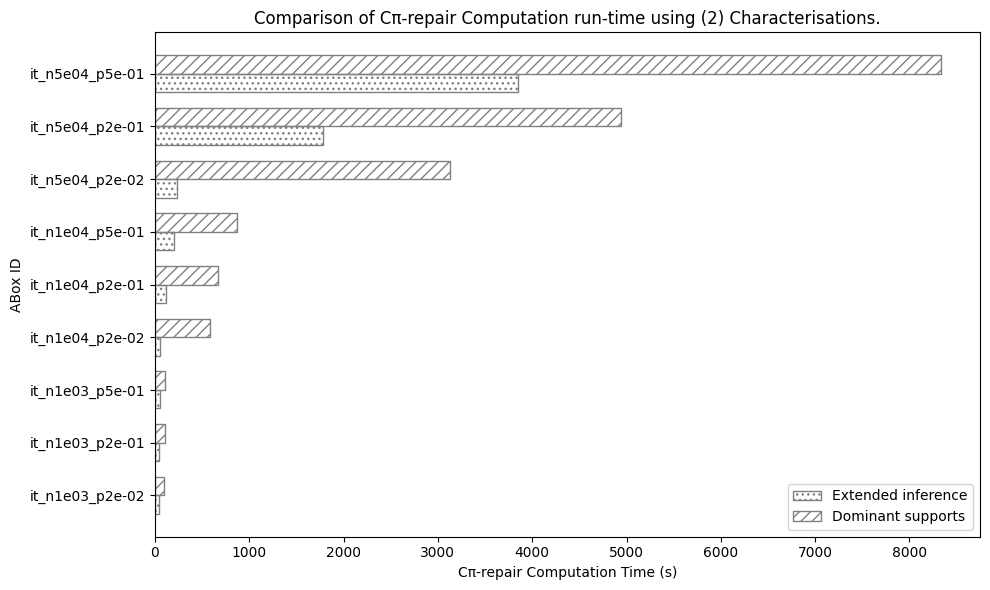

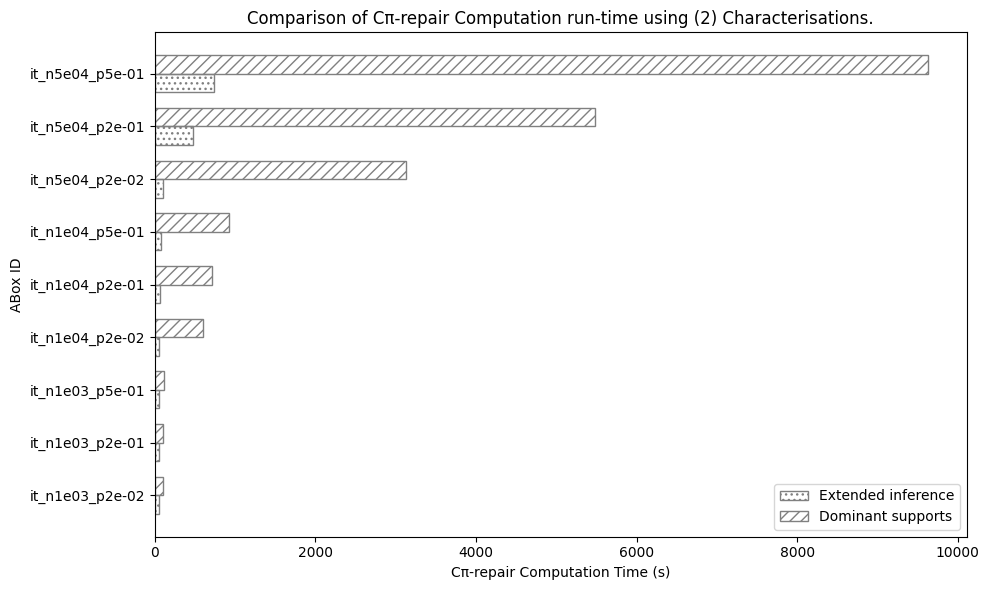

In [180]:
for exp in ["weaker_dominance", "stronger_dominance"]:

    repair_results = results_df[results_df['exp'] == exp][['ABox_id', 'old_method_Total_time', 'new_method_Total_time']]

    repair_results = repair_results.rename(columns={
        "old_method_Total_time": "Dominant_supports_(s)",
        "new_method_Total_time": "Extended_inference_(s)"
    })

    repair_results = repair_results.sort_values(by="Dominant_supports_(s)")

    repair_results.head(12)

    # Extract data
    abox_ids = repair_results['ABox_id']
    dominant_supports = repair_results['Dominant_supports_(s)']
    extended_inference = repair_results['Extended_inference_(s)']

    # X locations for the groups
    x = np.arange(len(abox_ids))
    width = 0.35  # width of the bars

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    bars1 = ax.barh(x - width/2, extended_inference, height=width, label='Extended inference', hatch=hatches.get('Extended_inference_(s)', '....'), edgecolor='gray', fill=False)
    bars2 = ax.barh(x + width/2, dominant_supports, height=width, label='Dominant supports', hatch=hatches.get('Dominant_supports_(s)', '....'), edgecolor='gray', fill=False)

    # Add labels and title
    ax.set_ylabel('ABox ID')
    ax.set_xlabel('Cπ-repair Computation Time (s)')
    ax.set_title('Comparison of Cπ-repair Computation run-time using (2) Characterisations.')

    # ax.set_yscale('log')

    ax.set_yticks(x)
    ax.set_yticklabels(abox_ids, rotation=0, ha='right')
    ax.legend()

    # Add value labels (optional)
    for bar in bars1 + bars2:
        height = bar.get_width()
        ax.annotate(f'{height:.2f}', xy=(bar.get_y() + bar.get_height() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

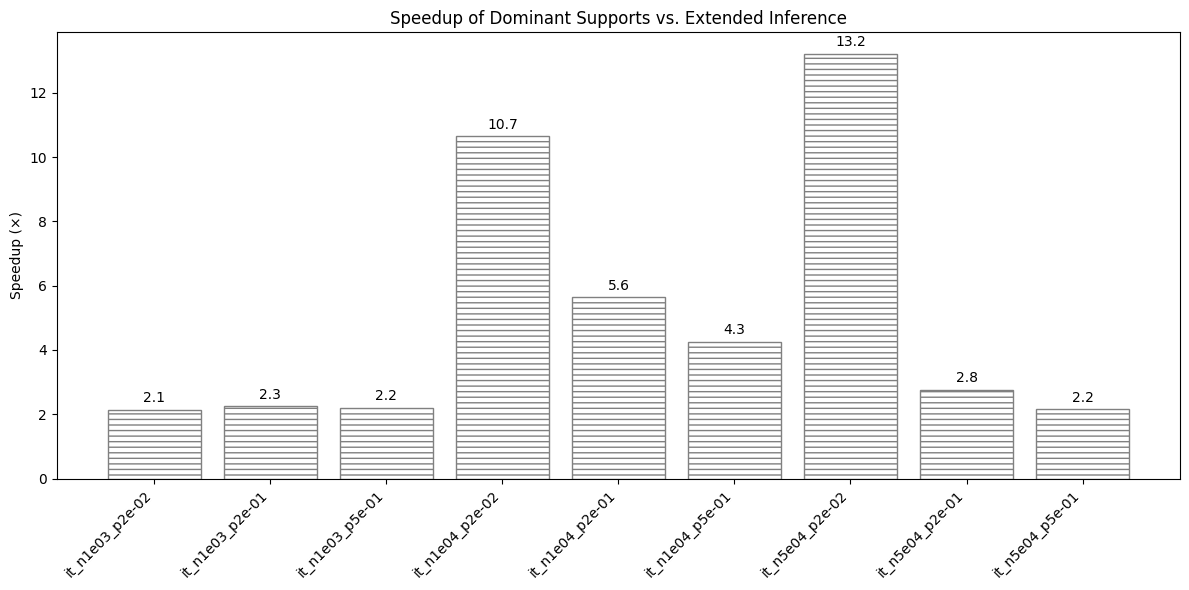

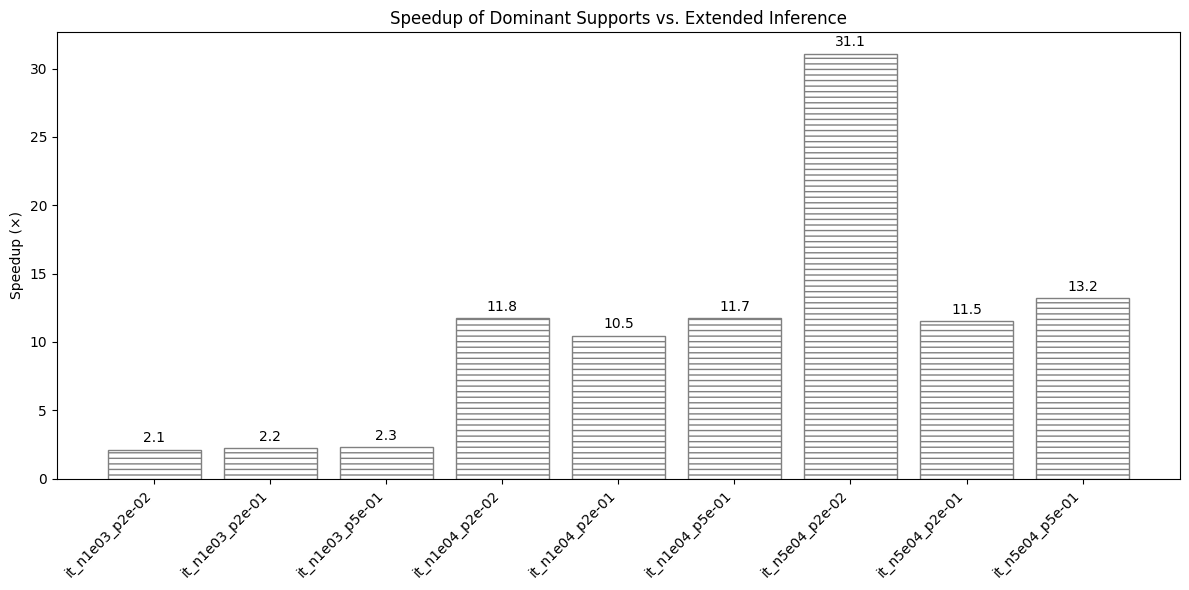

In [173]:
for exp in ["weaker_dominance", "stronger_dominance"]:

    repair_results = results_df[results_df['exp'] == exp][['ABox_id', 'old_method_Total_time', 'new_method_Total_time']]

    repair_results = repair_results.rename(columns={
        "old_method_Total_time": "Dominant_supports_(s)",
        "new_method_Total_time": "Extended_inference_(s)"
    })

    repair_results = repair_results.sort_values(by="Dominant_supports_(s)")

    # Compute speedup: how many times faster is the new method
    repair_results['Speedup'] = repair_results['Dominant_supports_(s)'] / repair_results['Extended_inference_(s)']

    # Plotting
    plt.figure(figsize=(12, 6))
    bars = plt.bar(repair_results['ABox_id'], repair_results['Speedup'], hatch=hatches.get('Speedup', '....'), edgecolor='gray', fill=False)

    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Speedup (×)')
    plt.title('Speedup of Dominant Supports vs. Extended Inference')
    plt.tight_layout()

    # Optional: annotate bars with values
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.1f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    plt.show()